In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

columbiformes_data = pd.read_csv('data/Columbiformes_data.csv', sep='\t')
larus_data = pd.read_csv('data/Larus_data.csv', sep='\t')

In [3]:
# columbiformes data with individualCount between 1 and 120, and without Geopelia cuneata
columbiformes_data = columbiformes_data[(columbiformes_data['individualCount'] > 0) & (columbiformes_data['individualCount'] < 121)]
columbiformes_data = columbiformes_data[columbiformes_data['species'] != 'Geopelia cuneata']
print(columbiformes_data['gbifID'].count())

# larus data with individualCount between 1 and 120, and without Larus delawarensis
larus_data = larus_data[(larus_data['individualCount'] > 0) & (larus_data['individualCount'] < 121)]
larus_data = larus_data[larus_data['species'] != 'Larus delawarensis']
print(larus_data['gbifID'].count())

57766
42050


In [4]:
# sorting data by species
c_species = columbiformes_data['species'].unique()
df_by_c_species = dict()

for specie in c_species:
    df_by_c_species[specie] = columbiformes_data[columbiformes_data['species'] == specie]
    
l_species = larus_data['species'].unique()
df_by_l_species = dict()

for specie in l_species:
    df_by_l_species[specie] = larus_data[larus_data['species'] == specie]

In [5]:
# sorting data by stateProvince
states = columbiformes_data['stateProvince'].unique()

c_df_by_states = dict()
l_df_by_states = dict()
for state in states:
    c_df_by_states[state] = columbiformes_data[columbiformes_data['stateProvince'] == state]
    l_df_by_states[state] = larus_data[larus_data['stateProvince'] == state]

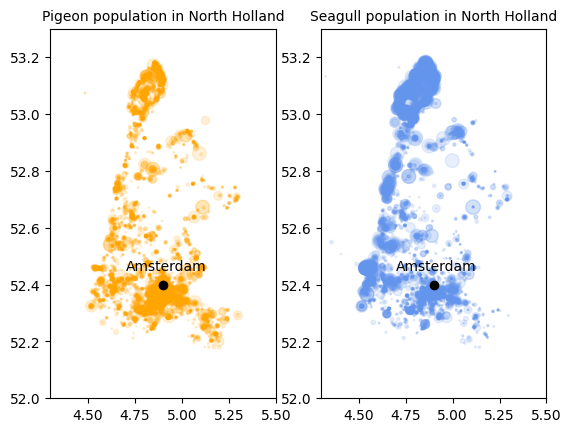

In [6]:
# plotting Noord-Holland
c_noord_holland = c_df_by_states['Noord-Holland']
l_noord_holland = l_df_by_states['Noord-Holland']

plt.subplot(1, 2, 1)
plt.scatter(c_noord_holland['decimalLongitude'], c_noord_holland['decimalLatitude'], s=c_noord_holland['individualCount'], alpha=0.15, color='orange')
plt.title('Pigeon population in North Holland', fontsize=10)
plt.annotate('Amsterdam', (4.7, 52.45))
plt.plot(4.9, 52.4, 'o', color='black')
plt.xlim(4.3, 5.5)
plt.ylim(52, 53.3)

plt.subplot(1, 2, 2)
plt.scatter(l_noord_holland['decimalLongitude'], l_noord_holland['decimalLatitude'], s=l_noord_holland['individualCount'], alpha=0.15, color='cornflowerblue')
plt.title('Seagull population in North Holland', fontsize=10)
plt.annotate('Amsterdam', (4.7, 52.45))
plt.plot(4.9, 52.4, 'o', color='black')
plt.xlim(4.3, 5.5)
plt.ylim(52, 53.3)

plt.show()

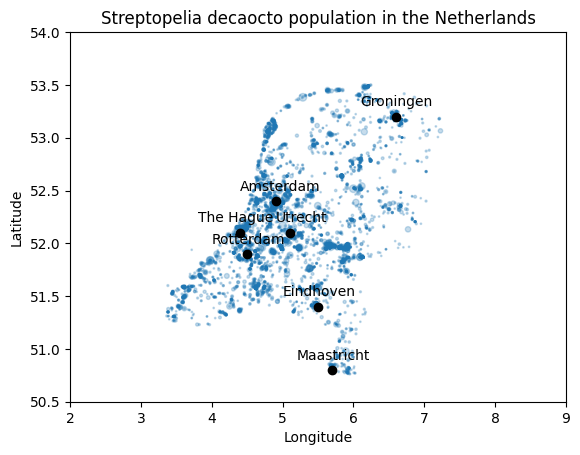

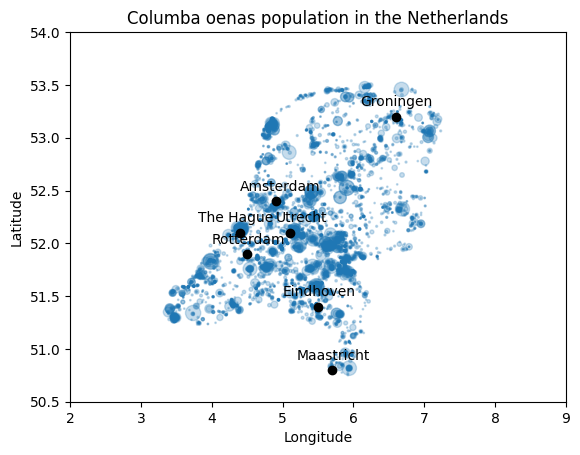

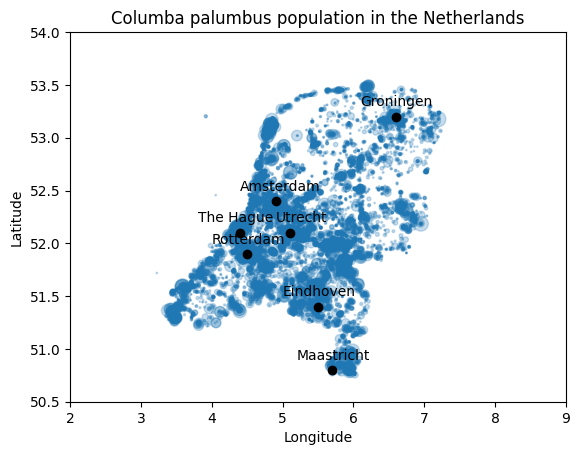

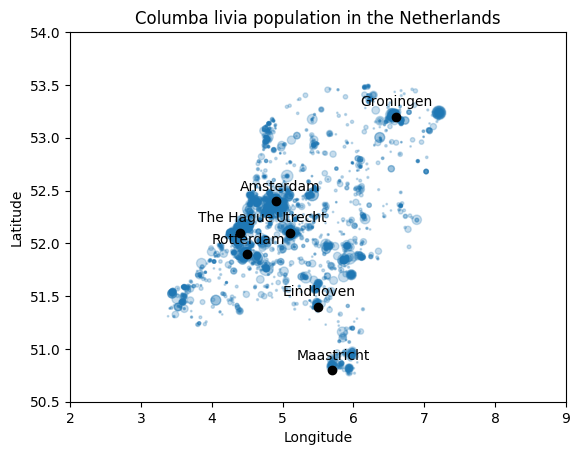

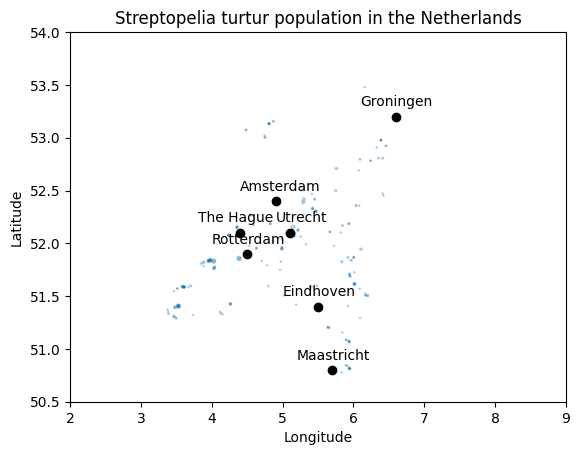

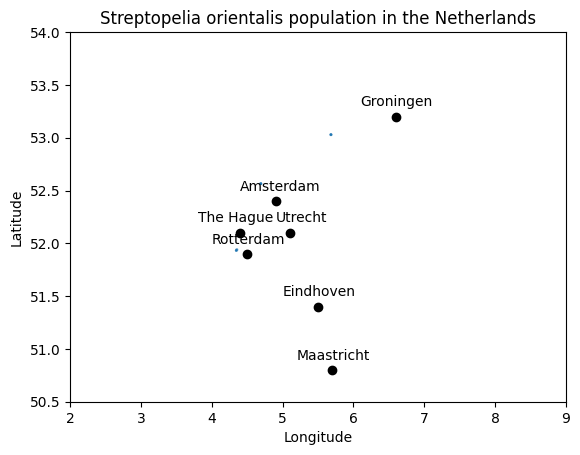

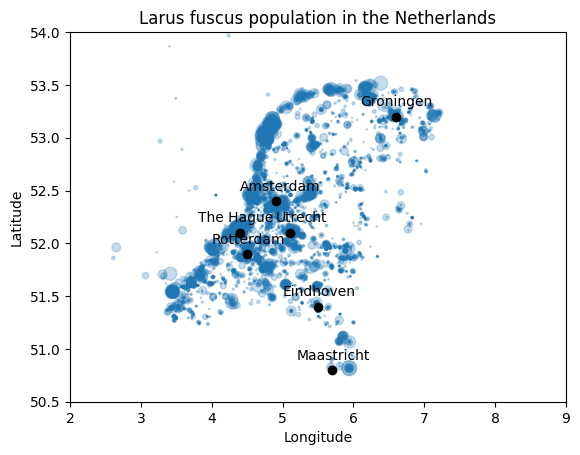

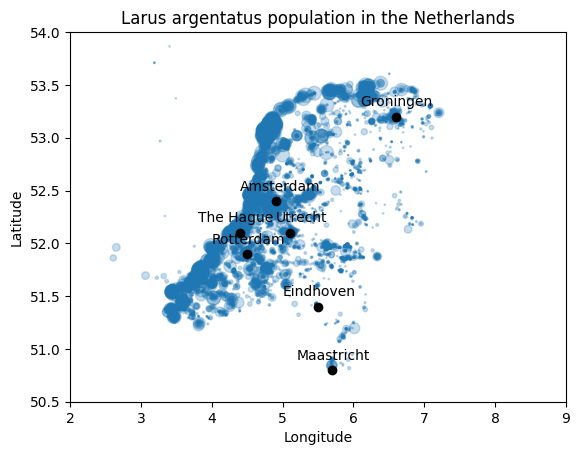

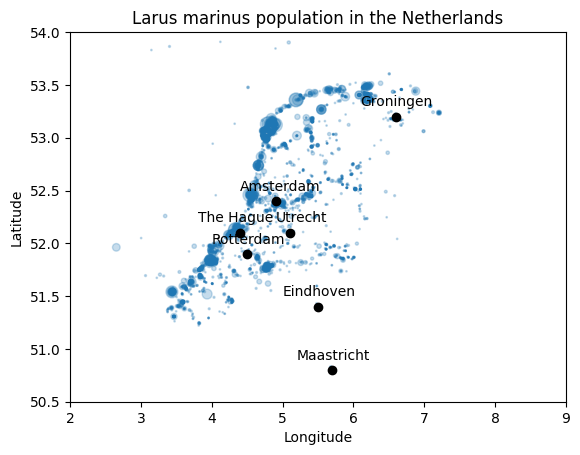

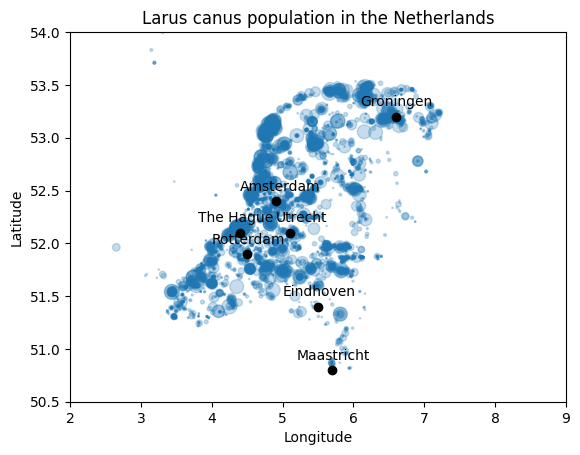

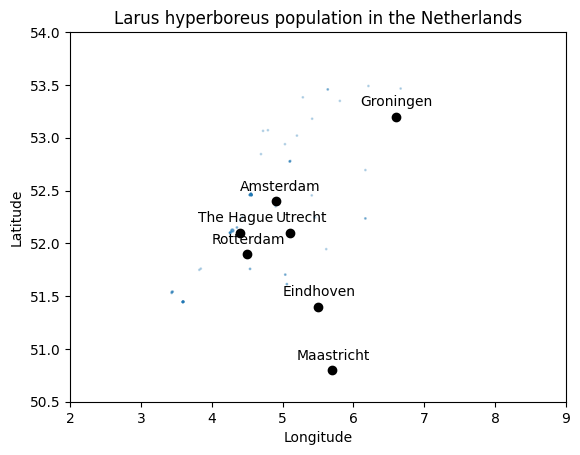

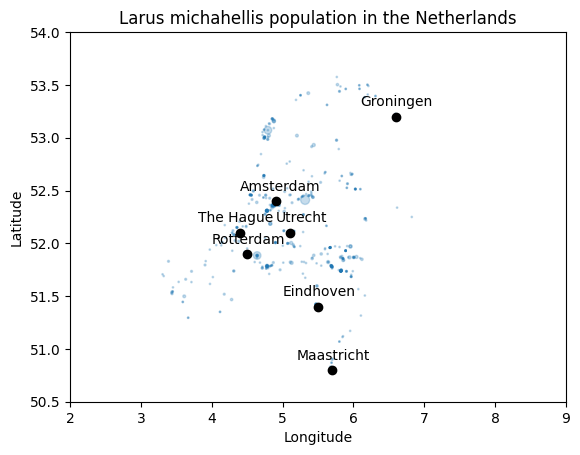

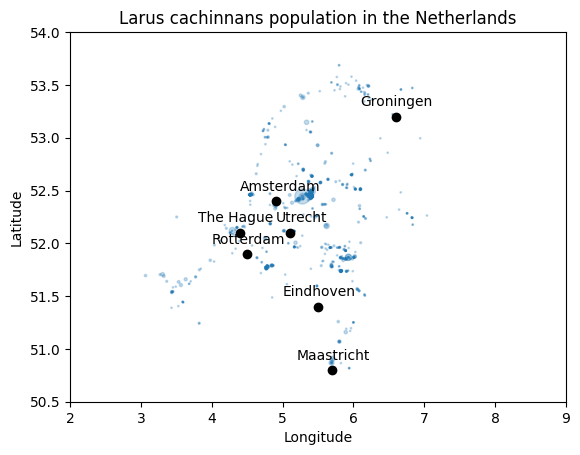

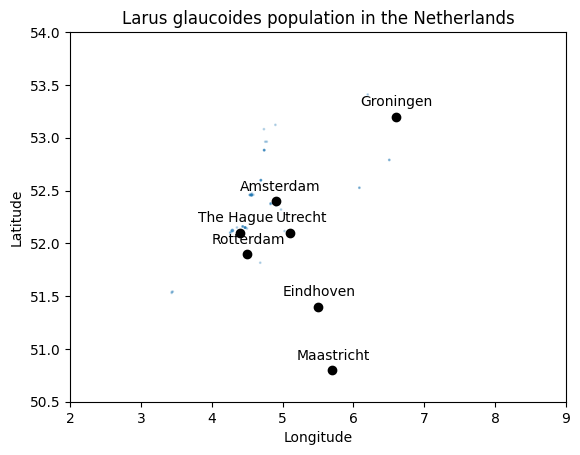

In [7]:
# all data plotted
bird_families = [(c_species, df_by_c_species), (l_species, df_by_l_species)]
for family, family_df in bird_families:
    for specie in family:
        specie_df = family_df[specie]
        plt.scatter(specie_df['decimalLongitude'], specie_df['decimalLatitude'], s=specie_df['individualCount'], alpha=0.25)
        plt.title((specie + ' population in the Netherlands'))
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.xlim(2, 9)
        plt.ylim(50.5, 54)
        plt.annotate('Amsterdam', (4.4, 52.5))
        plt.plot(4.9, 52.4, 'o', color='black')
        plt.annotate('The Hague', (3.8, 52.2))
        plt.plot(4.4, 52.1, 'o', color='black')
        plt.annotate('Rotterdam', (4, 52))
        plt.plot(4.5, 51.9, 'o', color='black')
        plt.annotate('Utrecht', (4.9, 52.2))
        plt.plot(5.1, 52.1, 'o', color='black')
        plt.annotate('Eindhoven', (5, 51.5))
        plt.plot(5.5, 51.4, 'o', color='black')
        plt.annotate('Groningen', (6.1, 53.3))
        plt.plot(6.6, 53.2, 'o', color='black')
        plt.annotate('Maastricht', (5.2, 50.9))
        plt.plot(5.7, 50.8, 'o', color='black')
        plt.show()